In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'ITC'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,ITC,ITC,ITC,ITC,ITC
0,2016-01-11,36.726799,37.650299,30.475401,33.103802,2660780
1,2016-01-12,40.349701,40.349701,35.661201,35.661201,2612147
2,2016-01-13,44.327900,44.327900,42.623001,43.972698,3832565
3,2016-01-14,45.819698,48.163898,44.043701,44.967201,3286828
4,2016-01-15,7800.000000,8000.000000,7700.000000,8000.000000,38430
...,...,...,...,...,...,...
1542,2022-02-24,34.200001,35.500000,34.000000,34.799999,282275
1543,2022-02-25,2.840000,2.860000,2.840000,2.860000,0
1544,2022-02-28,2.860000,2.860000,2.840000,2.840000,0


In [5]:
ma_100_days = data.Close.rolling(100).mean()

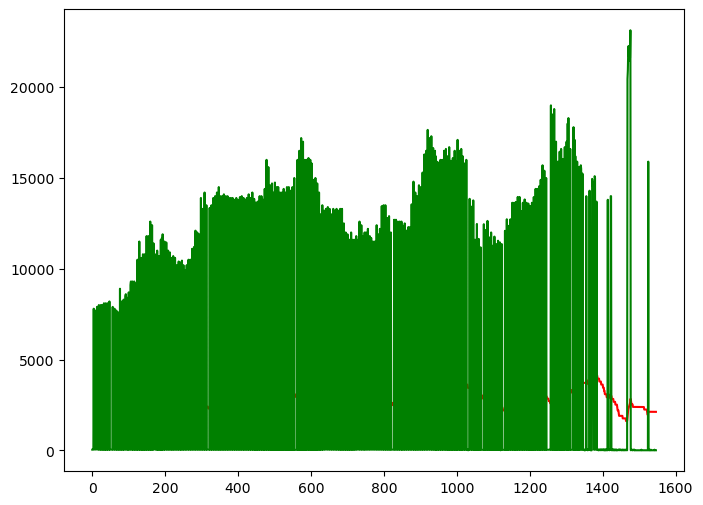

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

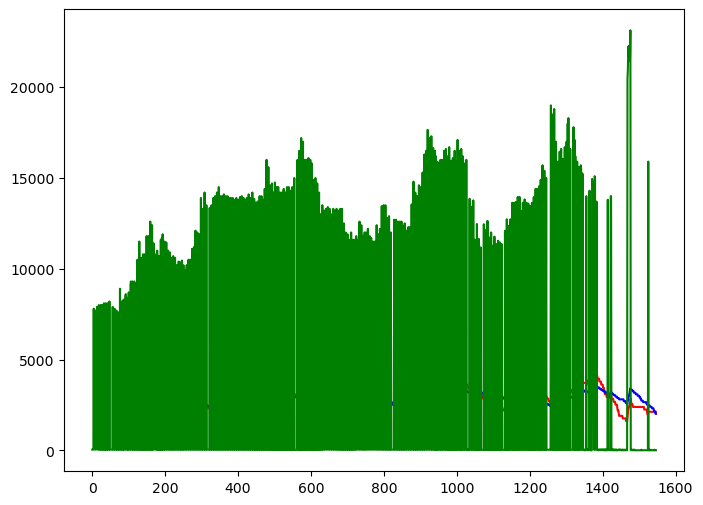

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1237

In [12]:
data_test.shape[0]

310

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 0.1045
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0947
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0949
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0929
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.1029
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0966
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0990
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0874
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0967
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0970
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0949
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0945
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0900
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.1008
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0984
Epoc

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

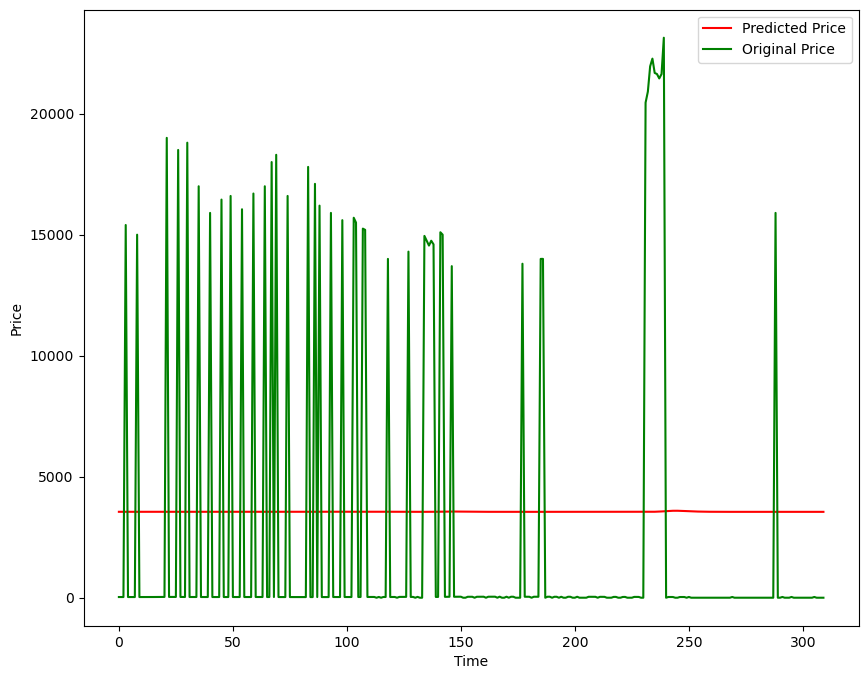

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
model.save('Stock Predictions Model.keras')